In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [82]:
df1 = pd.read_csv('application_record.csv')
df2 = pd.read_csv('credit.csv')
df = df1.merge(df2, how='inner', on=['ID'])

In [83]:
st = {'C' : 1, 'X' : 1,'0' : 0 ,'1' : 0,'2' : 0,'3' : 0,'4' : 0,'5' : 0}
df['STATUS'] = df['STATUS'].map(st).astype(int)

In [84]:
df.drop(['ID', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'FLAG_MOBIL'], axis=1, inplace=True)

label_encoder_NAME_HOUSING_TYPE  = LabelEncoder()
label_encoder_NAME_FAMILY_STATUS = LabelEncoder()
label_encoder_NAME_EDUCATION_TYPE  = LabelEncoder()
label_encoder_FLAG_OWN_CAR       = LabelEncoder()
label_encoder_FLAG_OWN_REALTY   = LabelEncoder()
label_encoder_CODE_GENDER   = LabelEncoder()
label_encoder_NAME_INCOME_TYPE   = LabelEncoder()
label_encoder_NAME_FAMILY_STATUS   = LabelEncoder()
df['NAME_HOUSING_TYPE'] = label_encoder_NAME_HOUSING_TYPE.fit_transform(df['NAME_HOUSING_TYPE'])
df['NAME_FAMILY_STATUS '] = label_encoder_NAME_FAMILY_STATUS .fit_transform(df['NAME_FAMILY_STATUS'])
df['FLAG_OWN_CAR'] = label_encoder_FLAG_OWN_CAR.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = label_encoder_FLAG_OWN_REALTY.fit_transform(df['FLAG_OWN_REALTY'])
df['CODE_GENDER'] = label_encoder_CODE_GENDER.fit_transform(df['CODE_GENDER'])
df['NAME_EDUCATION_TYPE'] = label_encoder_NAME_EDUCATION_TYPE.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_INCOME_TYPE'] = label_encoder_NAME_INCOME_TYPE.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_FAMILY_STATUS'] = label_encoder_NAME_FAMILY_STATUS.fit_transform(df['NAME_FAMILY_STATUS'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  int32  
 1   FLAG_OWN_CAR         777715 non-null  int32  
 2   FLAG_OWN_REALTY      777715 non-null  int32  
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  int32  
 6   NAME_EDUCATION_TYPE  777715 non-null  int32  
 7   NAME_FAMILY_STATUS   777715 non-null  int32  
 8   NAME_HOUSING_TYPE    777715 non-null  int32  
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  CNT_FAM_MEMBERS      777715 non-null  float64
 12  MONTHS_BALANCE       777715 non-null  int64  
 13  STATUS               777715 non-null  int32  
 14  NAME_FAMILY_STATUS   777715 non-null  int32  
dtypes: float64(2), in

In [86]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
mask = ((df < lower) | (df > upper)).any(axis = 1)

In [87]:
df[mask].shape

(413532, 15)

In [88]:
df[~mask].shape

(364183, 15)

In [89]:
mask1 = ((df >= lower) & (df <= upper)).all(axis = 1)

In [90]:
df[mask1].shape

(364183, 15)

In [91]:
df[~mask1].shape

(413532, 15)

In [92]:
df_iqr = df[mask1]

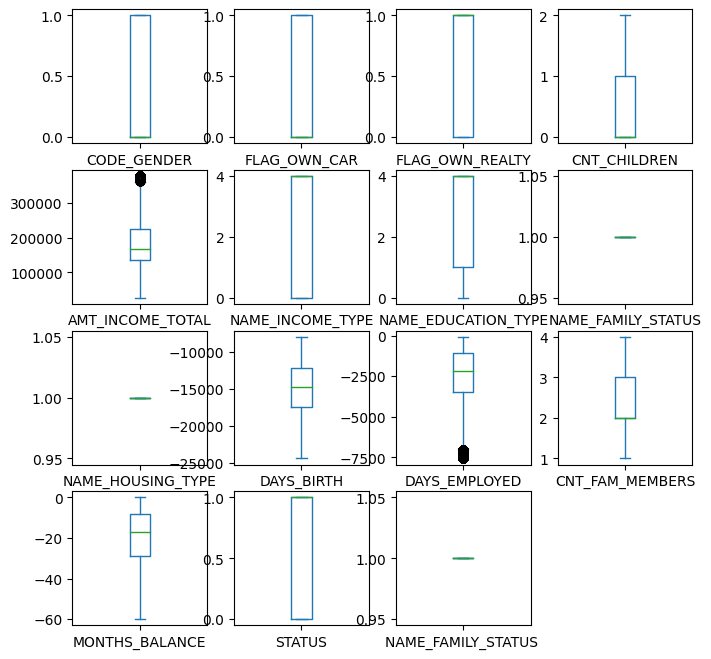

In [93]:
df_iqr.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(8,8)) 
plt.show() 

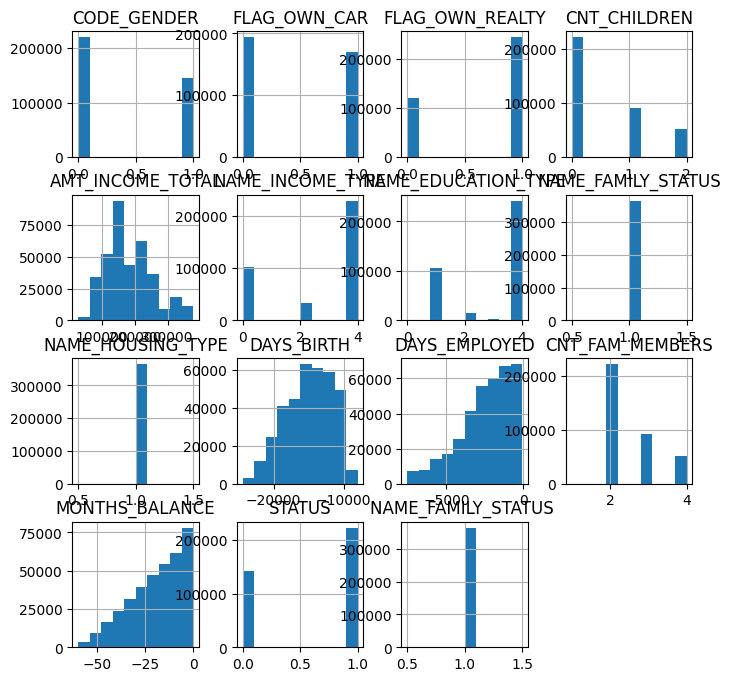

None


In [94]:
df_iqr.hist(figsize=(8,8))
print(plt.show())

In [95]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364183 entries, 31 to 777700
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          364183 non-null  int32  
 1   FLAG_OWN_CAR         364183 non-null  int32  
 2   FLAG_OWN_REALTY      364183 non-null  int32  
 3   CNT_CHILDREN         364183 non-null  int64  
 4   AMT_INCOME_TOTAL     364183 non-null  float64
 5   NAME_INCOME_TYPE     364183 non-null  int32  
 6   NAME_EDUCATION_TYPE  364183 non-null  int32  
 7   NAME_FAMILY_STATUS   364183 non-null  int32  
 8   NAME_HOUSING_TYPE    364183 non-null  int32  
 9   DAYS_BIRTH           364183 non-null  int64  
 10  DAYS_EMPLOYED        364183 non-null  int64  
 11  CNT_FAM_MEMBERS      364183 non-null  float64
 12  MONTHS_BALANCE       364183 non-null  int64  
 13  STATUS               364183 non-null  int32  
 14  NAME_FAMILY_STATUS   364183 non-null  int32  
dtypes: float64(2), int32(

In [112]:
df_iqr.nunique()

CODE_GENDER               2
FLAG_OWN_CAR              2
FLAG_OWN_REALTY           2
CNT_CHILDREN              3
AMT_INCOME_TOTAL        127
NAME_INCOME_TYPE          5
NAME_EDUCATION_TYPE       5
NAME_FAMILY_STATUS        1
NAME_HOUSING_TYPE         1
DAYS_BIRTH             3647
DAYS_EMPLOYED          2474
CNT_FAM_MEMBERS           4
MONTHS_BALANCE           61
STATUS                    2
NAME_FAMILY_STATUS        1
dtype: int64

KNeighborsClassifier ближайшие соседи

In [96]:
X = df_iqr.drop('STATUS', axis=1)
y = df_iqr['STATUS']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, recall, precision, f1)

Mean Squared Error: 0.26629323008910305
R^2 Score: -0.11946931225675606
0.7337067699108969 0.8093566461891581 0.7670341856646264 0.7876272856673602


In [97]:
params = {
    'n_neighbors': list(range(12, 13)),
    'weights': ['uniform', 'distance']
}

In [98]:
grid_search = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший результат: ", grid_search.best_score_)

Лучшие параметры:  {'n_neighbors': 12, 'weights': 'uniform'}
Лучший результат:  -0.2536537142443392


In [99]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, recall, precision, f1)

Mean Squared Error: 0.2524952977195656
R^2 Score: -0.06146422570189736
0.7475047022804344 0.8027858412655551 0.7874928259238003 0.7950658004702422


LogisticRegression регресия

In [100]:
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
x_train, x_test, y_train, y_test = train_test_split(df_iqr.drop(['STATUS'], axis = 1), df_iqr['STATUS'], test_size = 0.2)
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)


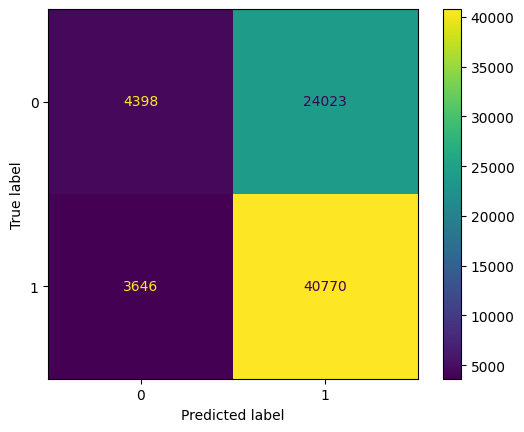

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [102]:

y_proba = model.predict_proba(x_test)
print(y_proba)
print(y_pred)


[[0.39773584 0.60226416]
 [0.36477126 0.63522874]
 [0.26699504 0.73300496]
 ...
 [0.36548834 0.63451166]
 [0.40889843 0.59110157]
 [0.58621787 0.41378213]]
[1 1 1 ... 1 1 0]


In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, recall, precision, f1)



0.6201243873306149 0.9179124639769453 0.6292346395443952 0.7466417602944811


In [104]:
y_true = y_test - 1
y_true

550958    0
50881    -1
293586    0
444050    0
144662   -1
         ..
269143    0
249849    0
236108    0
592591    0
575258    0
Name: STATUS, Length: 72837, dtype: int32

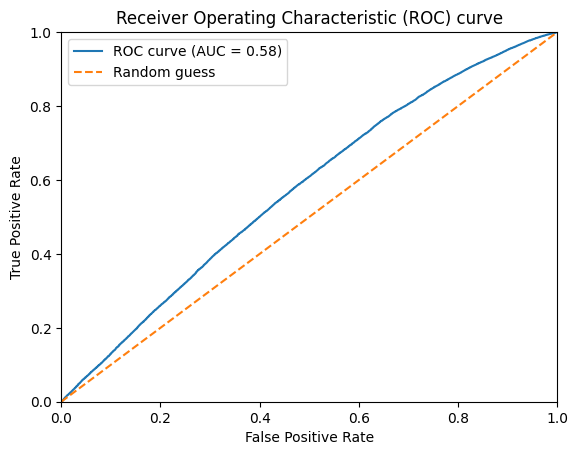

In [105]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_true = np.array(y_test)
y_prob = y_proba[:,1]
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

LinearDiscriminantAnalysis ЛДА

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_train, x_test, y_train, y_test = train_test_split(df_iqr.drop(['STATUS'], axis = 1), df_iqr['STATUS'], test_size = 0.2)
model = LinearDiscriminantAnalysis().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [107]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4761, 23463],
       [ 3545, 41068]], dtype=int64)

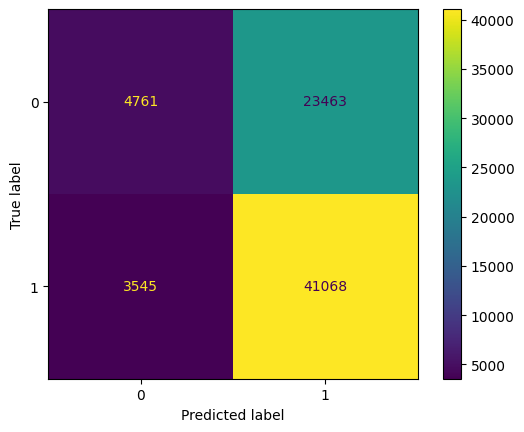

In [108]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [109]:
from sklearn.metrics import accuracy_score,f1_score
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, recall, precision, f1)

0.629199445336848 0.9205388563871517 0.6364073081154794 0.7525470937477095
